# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## <a name='toc'>Table Of Contents (TOC)</a>

-<a href = #lib>Importing necessary libraries</a>

-<a href = #load>Loading the dataset</a>

-<a href = #data>Data Overview</a>

-<a href = #eda>Exploratory Data Analysis</a>

-<a href = #pre>Data Preprocessing</a>

-<a href = #model>Model Building</a>

-<a href = #comp>Model Comparison and Final Model Selection</a>

-<a href = #actionable>Actionable Insights and Business Recommendations</a>


## <a name='lib'>Importing necessary libraries</a> <a href = #toc>TOC</a>

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)

## <a name='load'>Loading the dataset</a> <a href = #toc>TOC</a>

In [2]:
# read the data
loan = pd.read_csv('Loan_Modelling.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
data = loan.copy()

## <a name = 'data'>Data Overview</a> <a href = #toc>TOC</a>

* Observations
* Sanity checks

In [4]:
# dont need zipcode or id
data.drop(["ZIPCode", "ID"], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
# seperating these for later use

category_columns = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode"
]

numeric_columns = [
    "Age",
    "Experience",
    "Income",
    "CCAvg",
    "Mortgage"
]

In [8]:
# set category columns
for column in category_columns:
    data[column] = data[column].astype("category")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 333.2 KB


In [10]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [11]:
print(f"There are {data.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


In [12]:
for feature in numeric_columns:
    print(f"There are {(data[feature] == 0).sum()} zeros in {feature}")

There are 0 zeros in Age
There are 66 zeros in Experience
There are 0 zeros in Income
There are 106 zeros in CCAvg
There are 3462 zeros in Mortgage


## <a name = 'eda'>Exploratory Data Analysis</a> <a href = #toc>TOC</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Create subplots with specified figure size
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")

    # Histogram
    histplot_kwargs = {"data": data, "x": feature, "kde": kde, "ax": ax_hist, "palette": "winter"}
    if bins:
        histplot_kwargs["bins"] = bins
    sns.histplot(**histplot_kwargs)

    # Add mean and median lines to the histogram
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist.legend()

    plt.show()

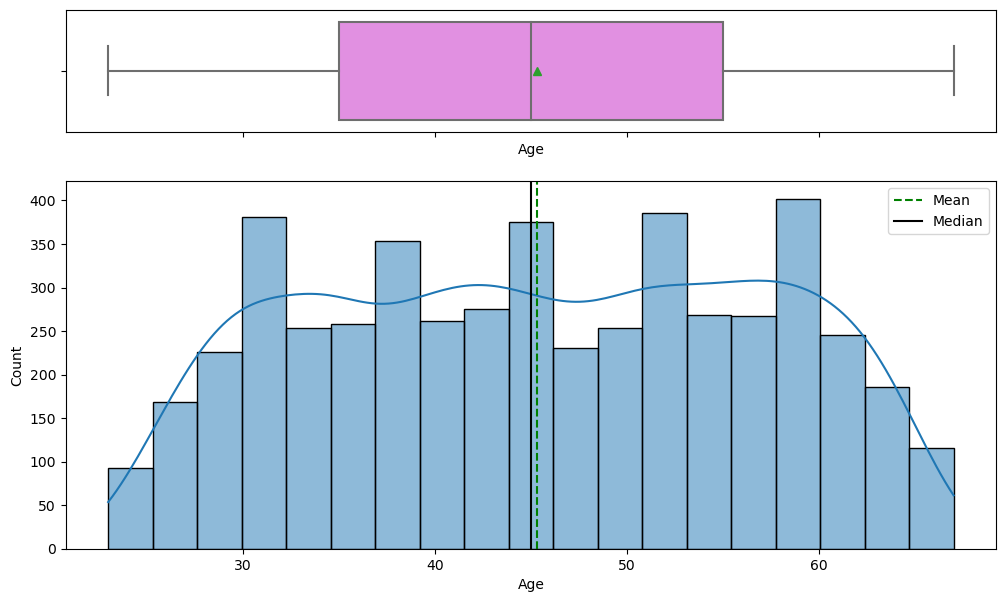

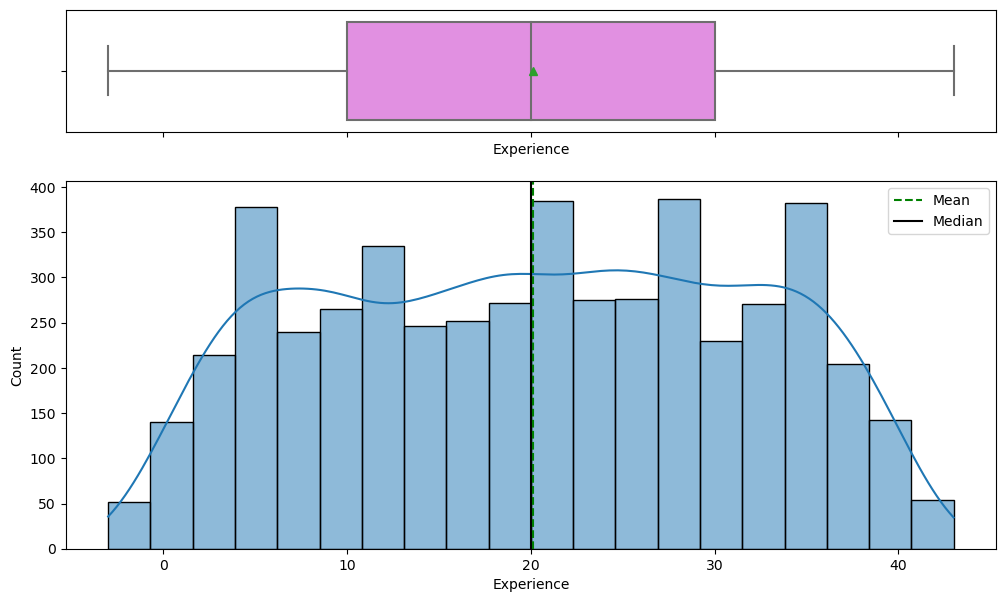

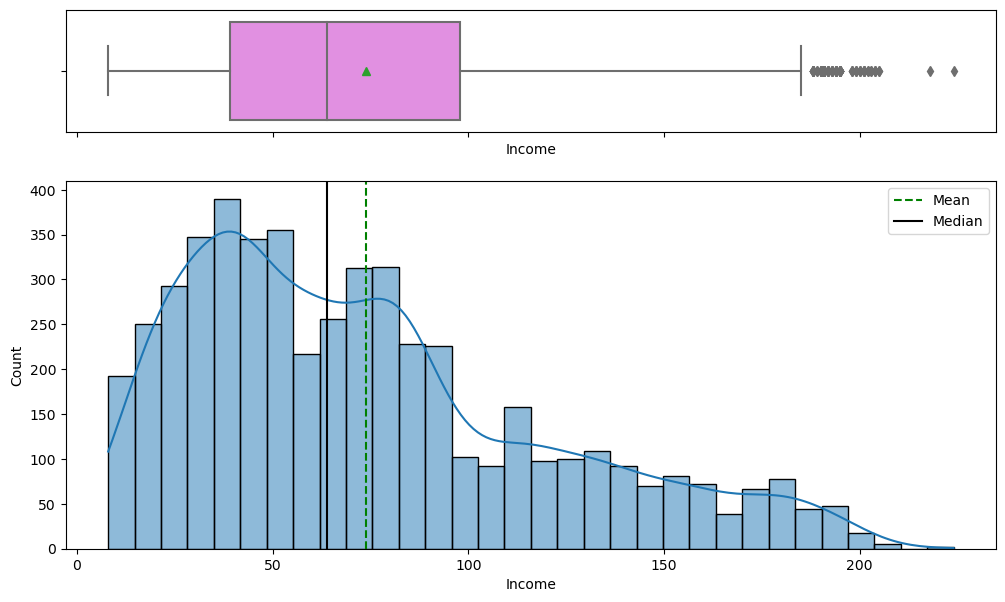

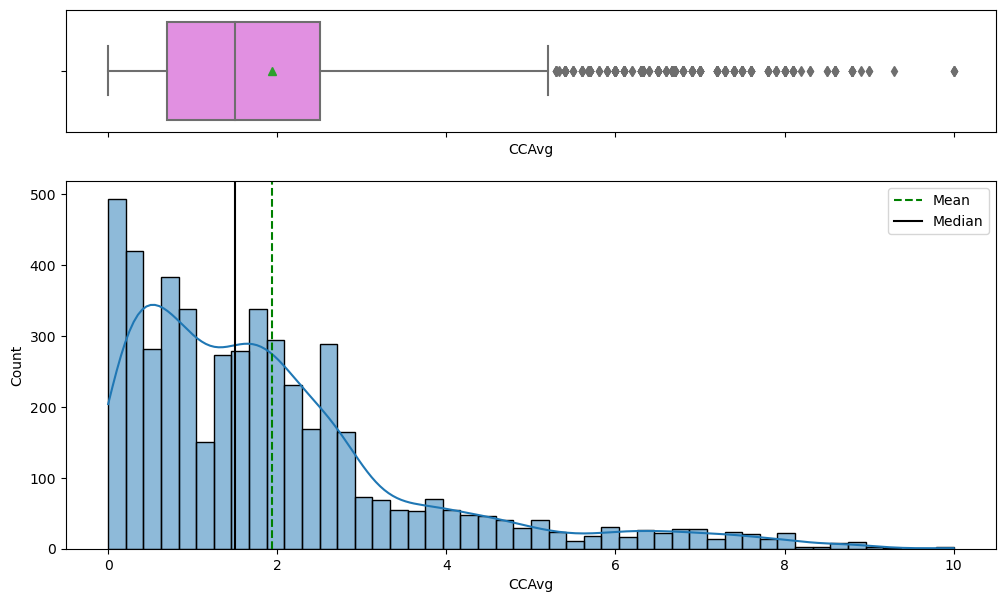

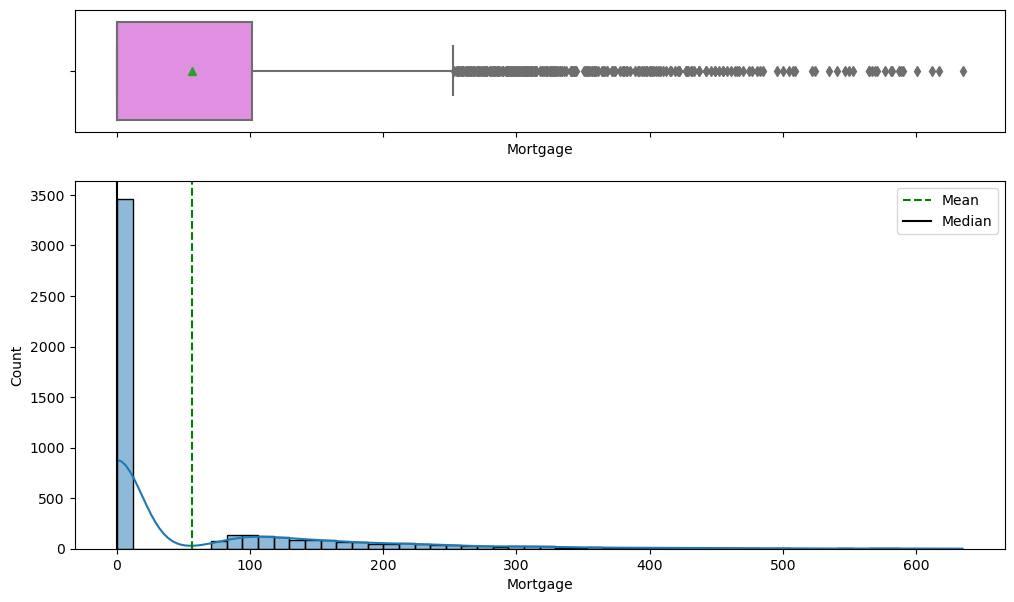

In [14]:
# plot histograms and boxplots for numericals
for feature in numeric_columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None)

### Observations

* Income, CCAvg and Mortgage are both Right Skewed
* There are outliers for Income, CCAvg and Mortgage
* Age and Experience have uniform distribution

Back to <a href = #eda>Exploratory Data Analysis</a>

In [15]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Create a labeled barplot.

    Parameters:
    - data: DataFrame
    - feature: DataFrame column
    - perc: Whether to display percentages instead of count (default is False)
    - n: Displays the top n category levels (default is None, i.e., display all levels)
    """

    total_samples = len(data[feature])  # total samples
    unique_categories = data[feature].nunique()  #unique categories

    # Set the figure size based on unique categories or specified 'n'
    figsize = (unique_categories + 2, 6) if n is None else (n + 2, 6)
    plt.figure(figsize=figsize)

    # Customize x-axis ticks
    plt.xticks(rotation=90, fontsize=15)

    # Create a countplot with specified order and color palette
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # Annotate each bar with count or percentage
    for p in ax.patches:
        if perc:
            label = f"{100 * p.get_height() / total_samples:.1f}%"  # percentage
        else:
            label = f"{p.get_height()}"  # count

        x = p.get_x() + p.get_width() / 2  # x-coordinate for annotation
        y = p.get_height()  # y-coordinate for annotation

        # Annotate the bar with count or percentage
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()  # display plot

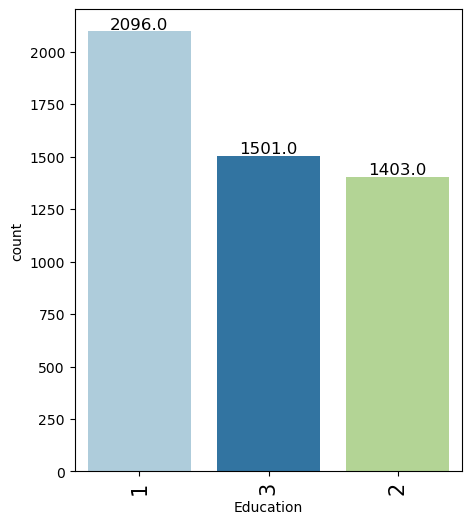

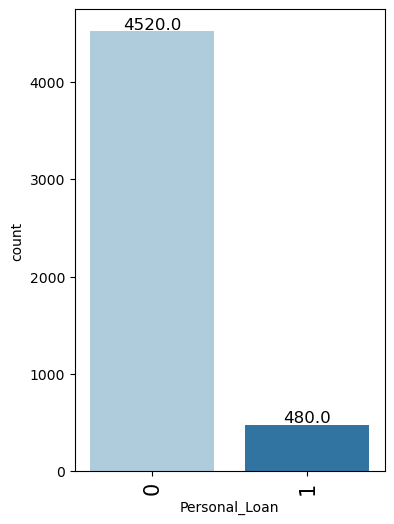

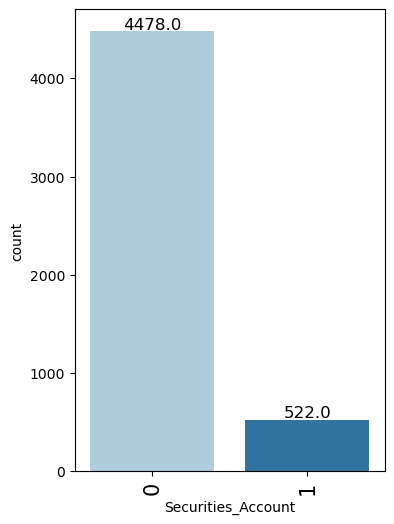

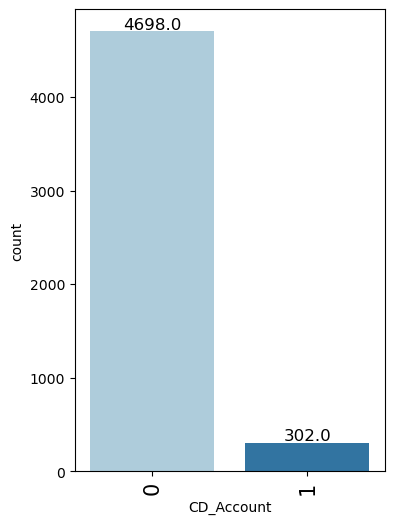

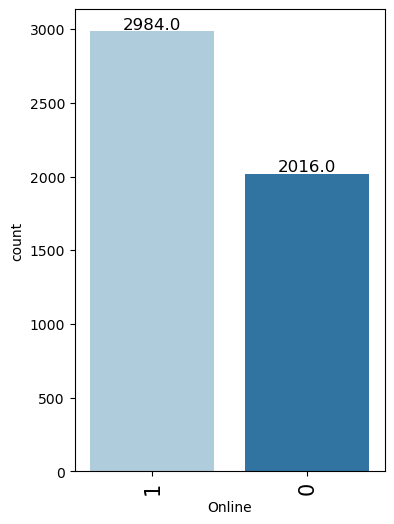

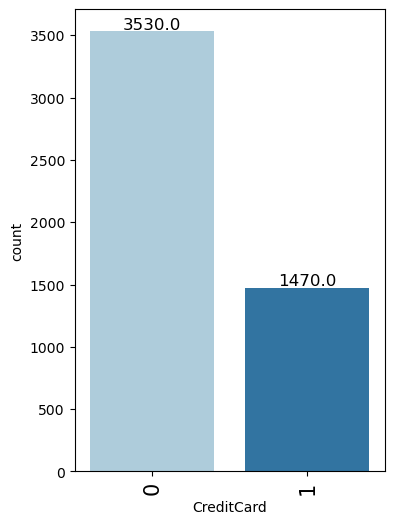

In [16]:
# plot barplots for categoricals
for column in category_columns[:-1]:
    labeled_barplot(data, column)

### Observations
* The target is imbalanced towards customers not getting personal loans
* The most customers have an Education level of 1
* There are similar imbalances to Personal Loans with Securities Acount, CD Account and Credit Cards
* More customers use internet banking facilities 
* 1455 customers have Credit Cards

### Multivariate Analysis <a href = #eda>Exploratory Data Analysis</a>

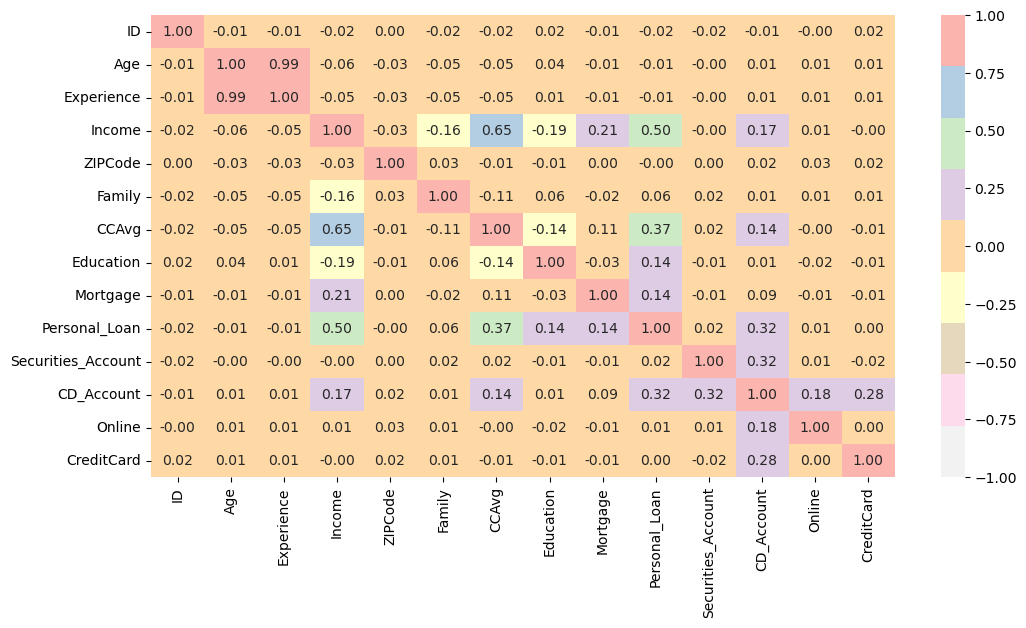

In [17]:
# get pearson correlation
corr = data.corr()

# Specify the size of the heatmap
plt.figure(figsize=(12, 6)) 

# plot the heatmap and show it
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='Pastel1_r')
plt.show()

<Figure size 2000x600 with 0 Axes>

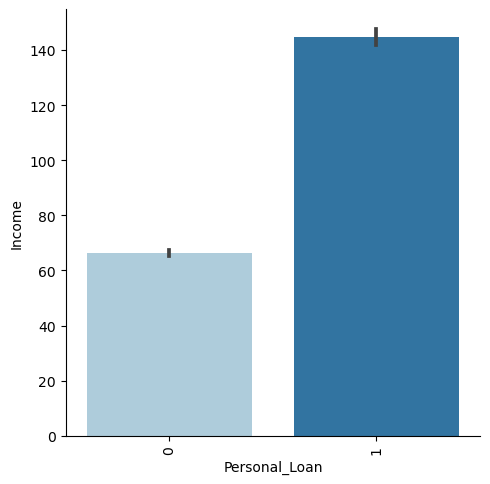

In [18]:
# plot personal loan vs income
plt.figure(figsize=(20,6))
sns.catplot(data=data,x= 'Personal_Loan', y='Income', kind='bar', palette="Paired")
plt.xticks(rotation=90);

<Figure size 2000x600 with 0 Axes>

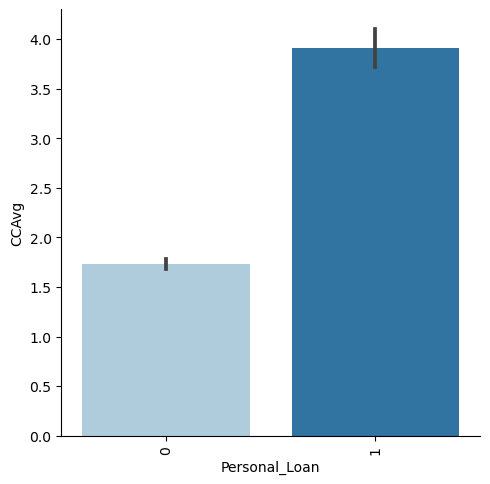

In [19]:
# plot personal loan vs ccavg
plt.figure(figsize=(20,6))
sns.catplot(data=data,x= 'Personal_Loan', y='CCAvg', kind='bar', palette="Paired")
plt.xticks(rotation=90);

<Figure size 2000x600 with 0 Axes>

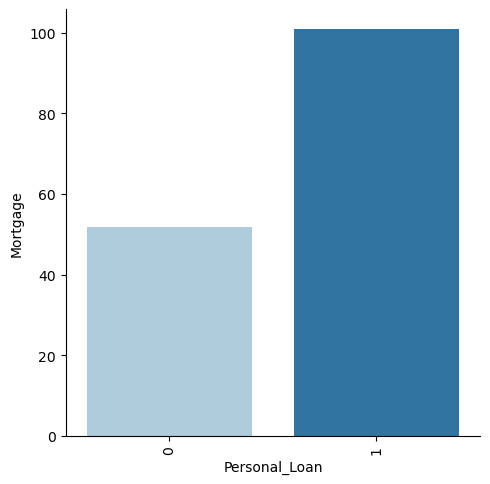

In [20]:
# plot personal loan vs mortgage
plt.figure(figsize=(20,6))
sns.catplot(x="Personal_Loan", y="Mortgage", data=data, kind="bar", ci=None, palette="Paired")
plt.xticks(rotation=90);

### Observations

* The most relevant features in order are; Income, CCAvg, CD_Account, Education and Mortgage
* The high correlation between Experience and Age may affect model performance
* Correlations between CD_Account and CreditCard, Online, Securities_Account, CCAvg and Income may affect model performance
* The higher the CCAvg, the more likely a customer would take out a Personal Loan
* The higher the Mortgage, the more likely a customer would take out a Personal Loan
* The higher the Income, the more likely a customer would take out a Personal Loan

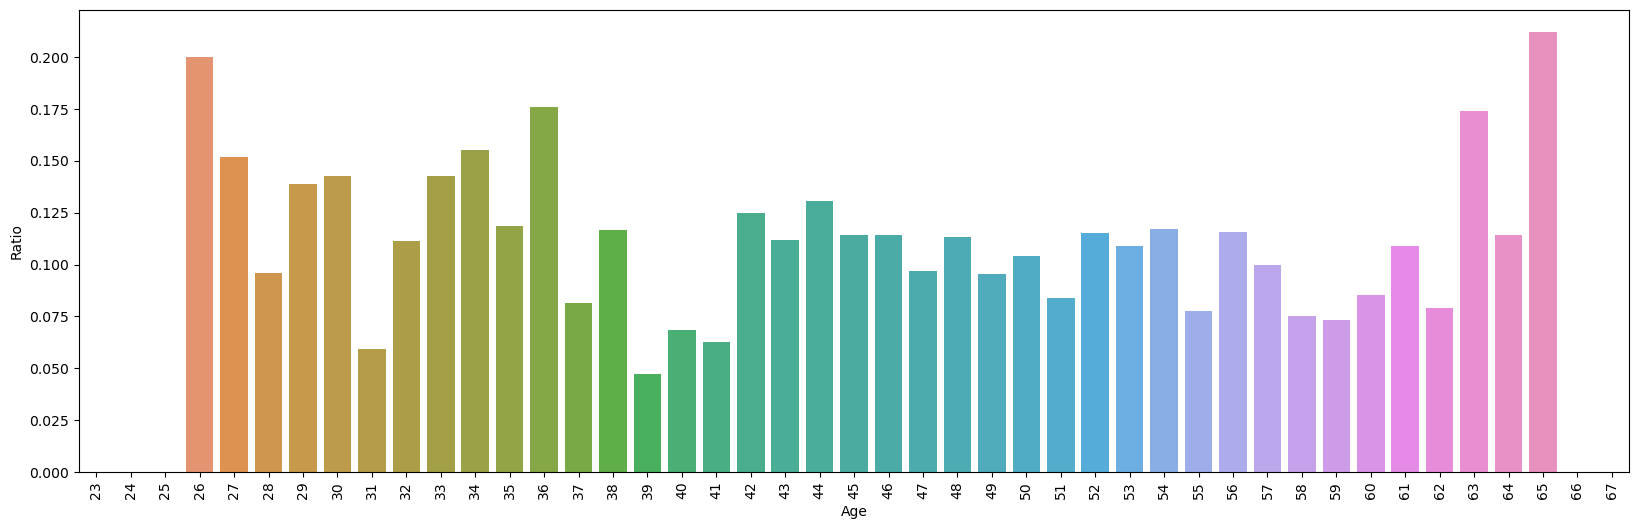

In [21]:
# Calculate counts and ratio
plt.figure(figsize=(20,6))
count_df = data.groupby(['Age', 'Personal_Loan']).size().unstack(fill_value=0)
count_df['Ratio'] = count_df[1] / count_df[0]

# Plot the ratio
sns.barplot(x=count_df.index, y='Ratio', data=count_df.reset_index())
plt.xticks(rotation=90);
plt.show()

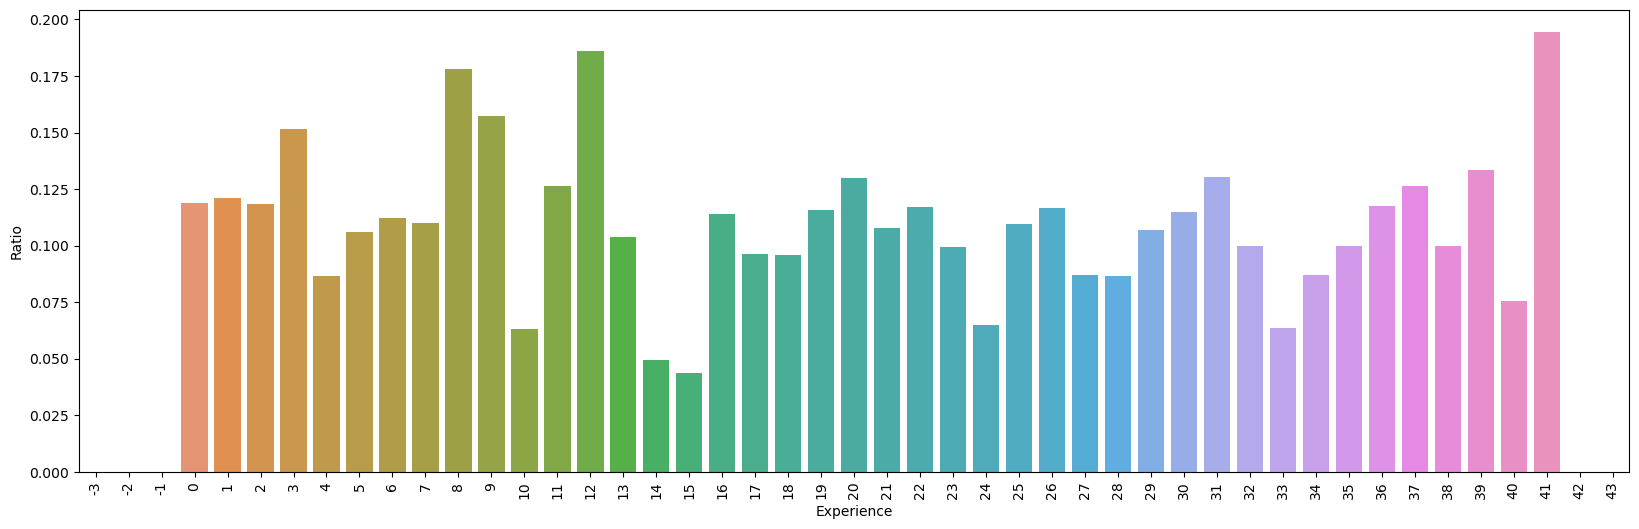

In [22]:
# Calculate counts and ratio
plt.figure(figsize=(20,6))
count_df = data.groupby(['Experience', 'Personal_Loan']).size().unstack(fill_value=0)
count_df['Ratio'] = count_df[1] / count_df[0]

# Plot the ratio
sns.barplot(x=count_df.index, y='Ratio', data=count_df.reset_index())
plt.xticks(rotation=90);
plt.show()

### Observations
* The ratio of Age to Personal Loan were highest at 26 and 65 years old, interest is lower at around age 40, and yougner customers seem to take out more personal loans. Otherwise interest seems uniform.
* The ration of Experience to personal loan were highest at 41 and 12 years of experience, interest is lower at around 15 years of experience. Customers with greater that 2 years but less than 13 years experience seem to take out more personal loans. Otherwise interest seems uniform.

## <a name = 'pre'>Data Preprocessing</a> <a href = #toc>TOC</a>

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [23]:
# Functions to treat outliers by flooring and capping

def treat_outliers(df, column):
    """
    Treats outliers in a variable

    df: dataframe
    column: dataframe column
    """
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper whiskers
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Replace outliers with whisker values
    df[column] = df[column].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

    return df

def treat_outliers_all(df, column_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    column_list: list of dataframe columns
    """
    # Iterate through columns and treat outliers
    for column in column_list:
        df = treat_outliers(df, column)

    return df

In [24]:
# treat outlier numeric columns
data = treat_outliers_all(data, numeric_columns)

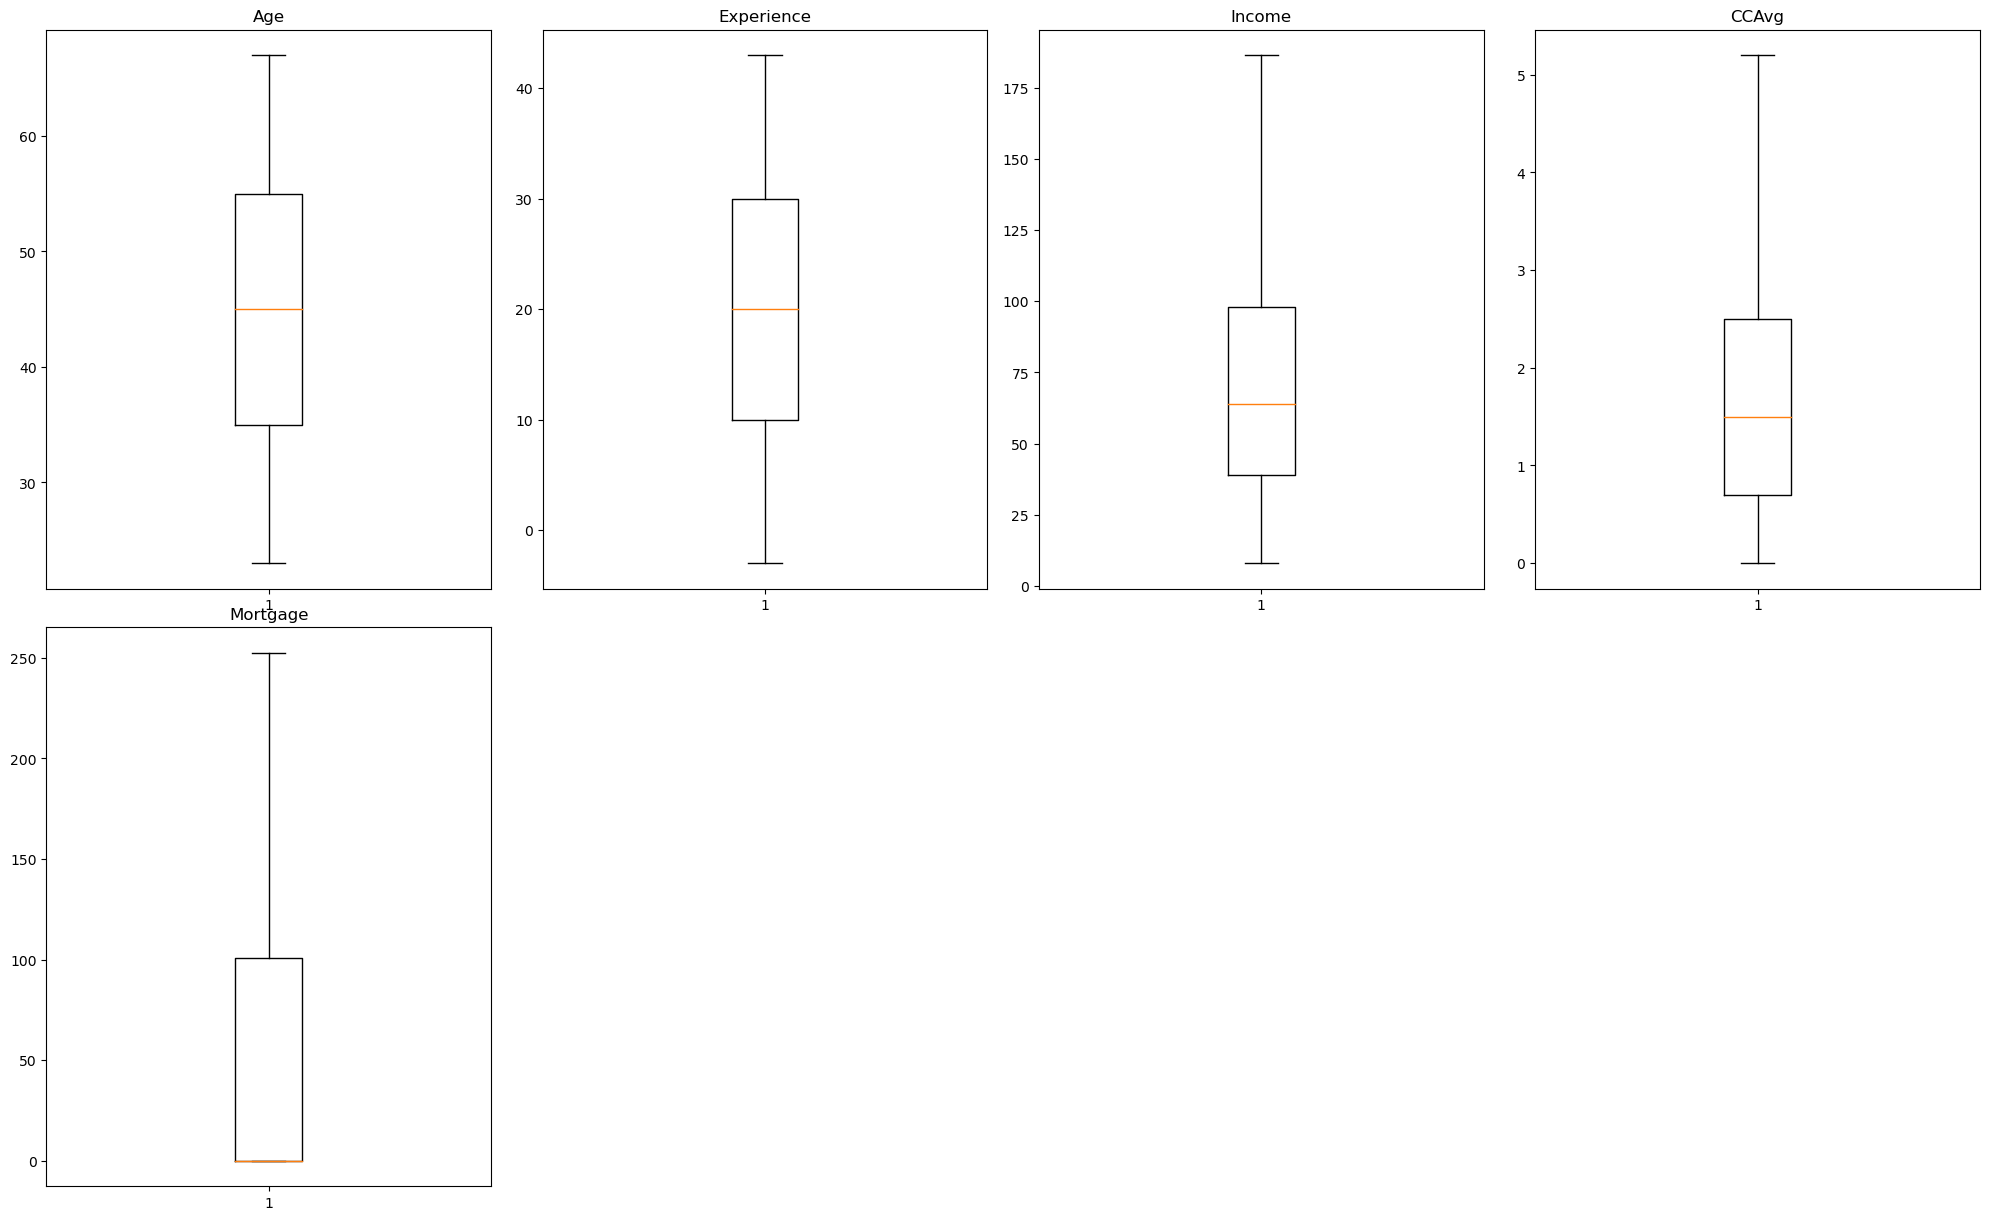

In [25]:
# box plot to see if outliers have been treated
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [26]:
# get number of negative experience rows
negative_counts = data[data['Experience'] < 0].copy()
negative_counts.shape

(52, 14)

In [27]:
# see how many of these have a personal loan attached
negative_counts['Personal_Loan'].value_counts()

Personal_Loan
0    52
1     0
Name: count, dtype: int64

In [28]:
# remove negative experience rows
data = data[data['Experience'] >= 0]

### Observation

- There are only around 1% of Experience values which are negative and they don't seem to have any impact on Personal Loans, so they were dropped.

## <a name = 'model'>Model Building</a> <a href = #toc>TOC</a>

-<a href = #base>Base Model</a>

-<a href = #balanced>Balanced Model</a>

-<a href = #no_zero>No Zero Model</a>

-<a href = #scaled>Scaled Model</a>

-<a href = #smote>SMOTE Model</a>

-<a href = #ros>ROS Model</a>

-<a href = #no_xp>SMOTE No Experience</a>

-<a href = #no_age>SMOTE No Age</a>

-<a href = #zip>SMOTE ZIPCodes</a>

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer will not get a Personal Loan but in reality, the customer does (FN)
- Predicting a customer will get a Personal Loan but in reality, the customer does not (FP)

**Which case is more important?**

- By optimizing `Precision`, marketing resources are efficiently allocated to customers who are more likely to convert, minimizing costs associated with targeting unlikely buyers
- High `Precision` ensures that false positives, customers incorrectly predicted to buy personal loans, are minimized
- Achieving high precision builds trust with the marketing department, showcasing the model's effectiveness in pinpointing potential loan buyers

**How to reduce the losses?**

The higher the `Precision` score, the more confident we can be that the instances predicted as positive are indeed positive. This is achieved by minimizing false positives.


### Model Building

In [29]:
# specifying the independent  and dependent variables
X = data.drop(["Personal_Loan"], axis=1).copy()
Y = data["Personal_Loan"]

In [30]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [31]:
# Function to calculate VIF for each predictor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [1 / (1 - LinearRegression().fit(X.drop(col, axis=1), X[col]).score(X.drop(col, axis=1), X[col])) 
                       for col in X.columns]
    return vif_data

# Calculate VIF for each predictor
vif_results = calculate_vif(X)

pd.set_option('display.max_rows', None)

notable_vif_columns = vif_results[vif_results["VIF"] > 5]

# Display the results
print(notable_vif_columns)

          Variable         VIF
1              Age  100.703571
2       Experience  100.660941
13   ZIPCode_90024   10.910549
39   ZIPCode_90089    9.729053
40   ZIPCode_90095   15.015376
45   ZIPCode_90245   10.914350
88   ZIPCode_91107    5.786284
99   ZIPCode_91320   11.500287
101  ZIPCode_91330   10.121432
111  ZIPCode_91380    5.391033
120  ZIPCode_91711   11.105786
144  ZIPCode_92028    7.370745
146  ZIPCode_92037   11.689912
154  ZIPCode_92093   11.105742
165  ZIPCode_92121    9.922504
178  ZIPCode_92182    7.364855
193  ZIPCode_92521    7.365455
195  ZIPCode_92612    5.188829
219  ZIPCode_92717    5.387552
247  ZIPCode_93106   12.089111
252  ZIPCode_93117    5.584550
259  ZIPCode_93407    6.178944
263  ZIPCode_93555    5.387293
273  ZIPCode_93943   11.690950
281  ZIPCode_94022    5.978997
283  ZIPCode_94025   11.299967
292  ZIPCode_94080    5.580754
298  ZIPCode_94105    5.785246
302  ZIPCode_94110    5.185872
316  ZIPCode_94143    8.358596
318  ZIPCode_94301    6.376384
320  ZIP

In [32]:
# how many columns are related to zipcode
zipcode_columns = X.filter(like="ZIPCode", axis=1)

percent_zipcodes = round((notable_vif_columns.shape[0] - 2) / zipcode_columns.shape[1], 2) * 100 
print(f"Roughly {percent_zipcodes}% of the ZIPCodes have enough correlation to each other to create a moderate to high VIF")

Roughly 10.0% of the ZIPCodes have enough correlation to each other to create a moderate to high VIF


### Observation

* Can possibly gain some model precision by removing Age or Experience.
* Can possibly gain some model precision by removing some ZIPCode columns

In [33]:
# adding a constant to the independent variables
X = sm.add_constant(X)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [34]:
# Display information about the datasets

# Training set shape
print(f"Shape of Training set: {X_train.shape}")

# Test set shape
print(f"Shape of Test set: {X_test.shape}")

# Percentage of classes in the training set
print("Percentage of classes in the Training set:")
print(y_train.value_counts(normalize=True))

# Percentage of classes in the test set
print("Percentage of classes in the Test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set: (3463, 480)
Shape of Test set: (1485, 480)
Percentage of classes in the Training set:
Personal_Loan
0    0.903263
1    0.096737
Name: proportion, dtype: float64
Percentage of classes in the Test set:
Personal_Loan
0    0.902357
1    0.097643
Name: proportion, dtype: float64


### <a name = 'base'>Base Model</a> <a href = #model>Model Building</a>

In [35]:
# build the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### Model Performance Improvement

In [36]:
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # Ensure predictors are of type np.array with float64 dtype
    predictors_np = np.array(predictors, dtype=np.float64)

    # Predict probabilities and convert to binary predictions using the threshold
    pred_probabilities = model.predict(predictors_np)
    pred_classes = (pred_probabilities > threshold).astype(int)

    # Compute performance metrics
    acc = accuracy_score(target, pred_classes)
    recall = recall_score(target, pred_classes)
    precision = precision_score(target, pred_classes)
    f1 = f1_score(target, pred_classes)

    # Create a DataFrame of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [37]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # Ensure predictors are of type np.array with float64 dtype
    predictors_np = np.array(predictors, dtype=np.float64)
    
    # Predict binary classes based on the threshold
    y_pred = (model.predict(predictors_np) > threshold).astype(int)
    
    # Compute confusion matrix
    cm = confusion_matrix(target, y_pred)
    
    # Calculate percentages and format labels
    labels = [
        ["{0:0.0f}\n{1:.2%}".format(item, item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
    labels = np.asarray(labels).reshape(*cm.shape)

    # Plot the confusion matrix with percentages
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", cbar=False, annot_kws={"size": 12})
    
    # Set labels and title
    plt.ylabel("True label", fontsize=12)
    plt.xlabel("Predicted label", fontsize=12)
    plt.title("Confusion Matrix", fontsize=14)
    
    plt.show()

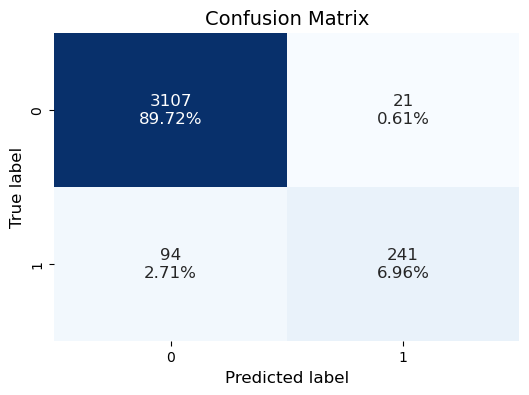

In [38]:
# apply matrix
confusion_matrix_statsmodels(model, X_train, y_train)

In [39]:
# model performances are compared in the next section
print("Training performance:")
base_model_train_performance = model_performance_classification_statsmodels(model, X_train, y_train)
base_model_train_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.966792,0.719403,0.919847,0.80737


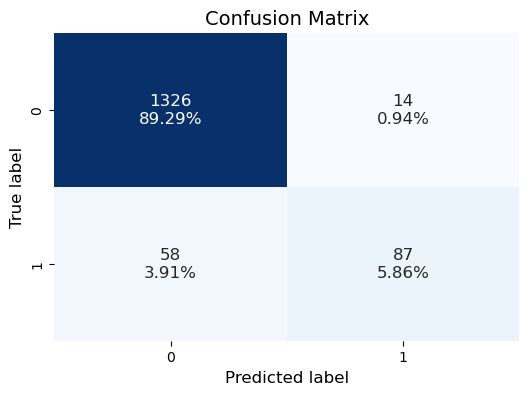

In [40]:
confusion_matrix_statsmodels(model, X_test, y_test)

In [41]:
print("Testing performance:")
base_model_test_performance = model_performance_classification_statsmodels(model, X_test, y_test)
base_model_test_performance

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.951515,0.6,0.861386,0.707317


In [42]:
# models_list is used to draw the roc auc and precisions recall curves
models_list = [{"name": "base", 
                "model": model, 
                "X_train": X_train, 
                "y_train": y_train, 
                "X_test": X_test, 
                "y_test": y_test}]

### <a name = 'balanced'>Balanced Model</a> <a href = #model>Model Building</a>

In [43]:
# build the model
balanced_model = LogisticRegression(solver="liblinear", class_weight="balanced")
balanced_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

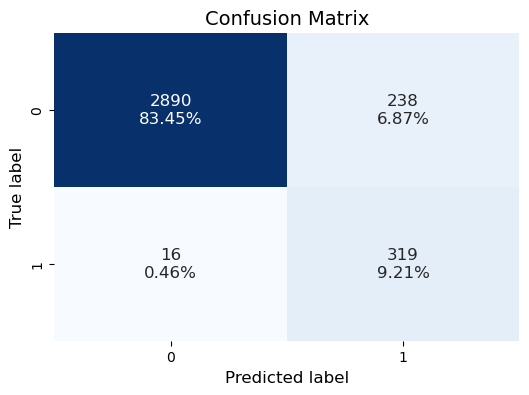

In [44]:
confusion_matrix_statsmodels(balanced_model, X_train, y_train)

In [45]:
print("Training performance:")
balanced_model_train_performance = model_performance_classification_statsmodels(balanced_model, X_train, y_train)
balanced_model_train_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.926653,0.952239,0.572711,0.715247


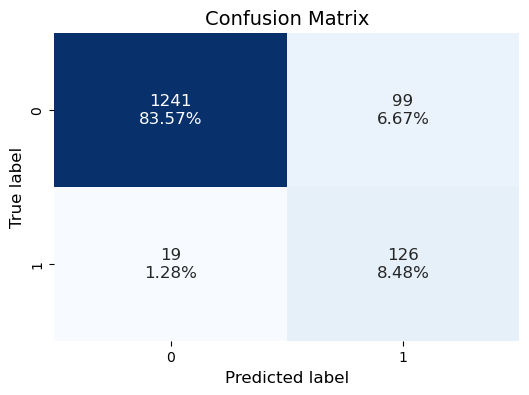

In [46]:
confusion_matrix_statsmodels(balanced_model, X_test, y_test)

In [47]:
print("Testing performance:")
balanced_model_test_performance = model_performance_classification_statsmodels(balanced_model, X_test, y_test)
balanced_model_test_performance

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.920539,0.868966,0.56,0.681081


In [48]:
models_list.append({"name": "balanced", 
                    "model": balanced_model, 
                    "X_train": X_train, 
                    "y_train": y_train, 
                    "X_test": X_test, 
                    "y_test": y_test})

### <a name = 'no_zero'>No Zero Model</a> <a href = #model>Model Building</a>

In [49]:
# impute numeric columns with zeros to mean
imputer = SimpleImputer(missing_values=0, strategy='mean')

X_train_no_zero = X_train.copy()

for feature in numeric_columns:
    if (X_train_no_zero[feature] == 0).any():
        X_train_no_zero[[feature]] = imputer.fit_transform(X_train_no_zero[[feature]])

In [126]:
for feature in numeric_columns:
    print(f"There are {(X_train_no_zero[feature] == 0).sum()} zeros in {feature}")

There are 0 zeros in Age
There are 0 zeros in Experience
There are 0 zeros in Income
There are 0 zeros in CCAvg
There are 0 zeros in Mortgage


In [50]:
# build the model
no_zero_model = LogisticRegression(solver="liblinear")
no_zero_model.fit(X_train_no_zero, y_train)

LogisticRegression(solver='liblinear')

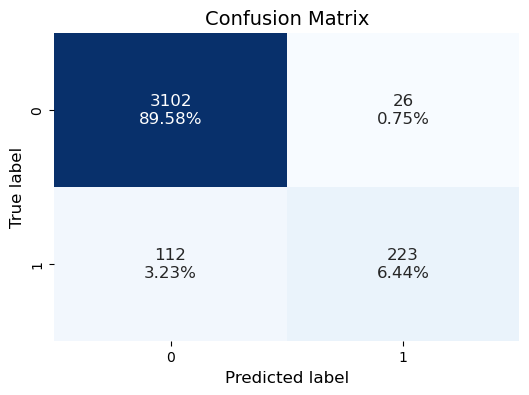

In [51]:
confusion_matrix_statsmodels(no_zero_model, X_train_no_zero, y_train)

In [52]:
print("Training performance:")
no_zero_model_train_performance = model_performance_classification_statsmodels(no_zero_model, X_train_no_zero, y_train)
no_zero_model_train_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.96015,0.665672,0.895582,0.763699


In [53]:
X_test_no_zero = X_test.copy()

for feature in numeric_columns:
    if (X_test_no_zero[feature] == 0).any():
        X_test_no_zero[[feature]] = imputer.fit_transform(X_test_no_zero[[feature]])

In [54]:
for feature in numeric_columns:
    print(f"There are {(X_test_no_zero[feature] == 0).sum()} zeros in {feature}")

There are 0 zeros in Age
There are 0 zeros in Experience
There are 0 zeros in Income
There are 0 zeros in CCAvg
There are 0 zeros in Mortgage


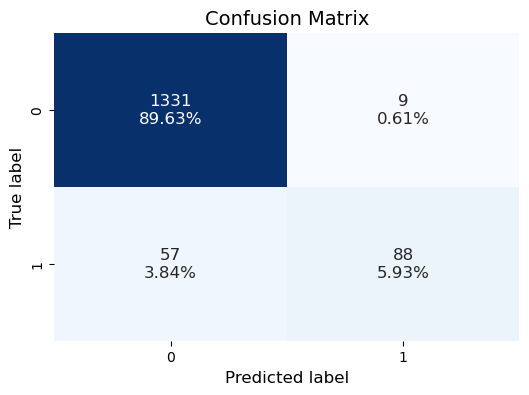

In [55]:
confusion_matrix_statsmodels(no_zero_model, X_test_no_zero, y_test)

In [56]:
print("Testing performance:")
no_zero_model_test_performance = model_performance_classification_statsmodels(no_zero_model, X_test_no_zero, y_test)
no_zero_model_test_performance

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.955556,0.606897,0.907216,0.727273


In [57]:
models_list.append({"name": "no_zero", 
                    "model": no_zero_model, 
                    "X_train": X_train_no_zero, 
                    "y_train": y_train, 
                    "X_test": X_test_no_zero, 
                    "y_test": y_test})

### <a name = 'scaled'>Scaled Model</a> <a href = #model>Model Building</a>

In [58]:
# scale features in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# splitting data in train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, Y, test_size=0.30, random_state=1
)

In [60]:
# build the model
scaled_model = LogisticRegression(solver="liblinear")
scaled_model.fit(X_train_scaled, y_train_scaled)

LogisticRegression(solver='liblinear')

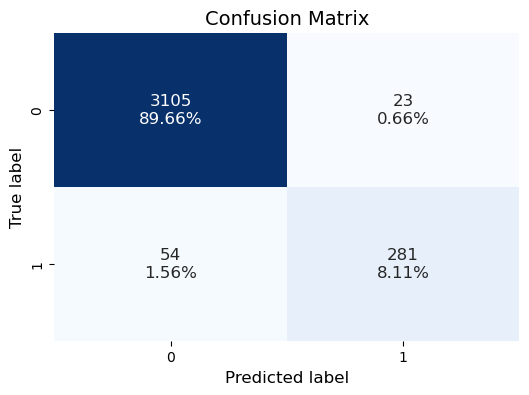

In [61]:
confusion_matrix_statsmodels(scaled_model, X_train_scaled, y_train_scaled)

In [62]:
print("Training performance:")
scaled_model_train_performance = model_performance_classification_statsmodels(scaled_model, X_train_scaled, y_train_scaled)
scaled_model_train_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.977765,0.838806,0.924342,0.879499


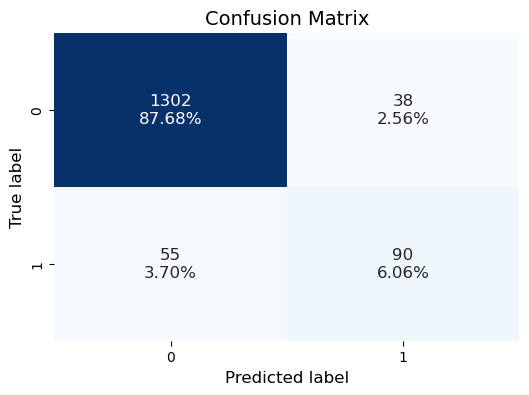

In [63]:
confusion_matrix_statsmodels(scaled_model, X_test_scaled, y_test_scaled)

In [64]:
print("Testing performance:")
scaled_model_test_performance = model_performance_classification_statsmodels(scaled_model, X_test_scaled, y_test_scaled)
scaled_model_test_performance

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.937374,0.62069,0.703125,0.659341


In [65]:
models_list.append({"name": "scaled", 
                    "model": scaled_model, 
                    "X_train": X_train_scaled, 
                    "y_train": y_train_scaled, 
                    "X_test": X_test_scaled, 
                    "y_test": y_test_scaled})

### <a name = 'smote'>SMOTE Model</a> <a href = #model>Model Building</a>

In [66]:
# resammple using SMOTE
smote_sampler = SMOTE()
X_smote, y_smote = smote_sampler.fit_resample(X, Y)

In [67]:
# create datasets for model
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.30, random_state=1
)

In [68]:
# build the model
smote_model = LogisticRegression(solver="liblinear")
smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(solver='liblinear')

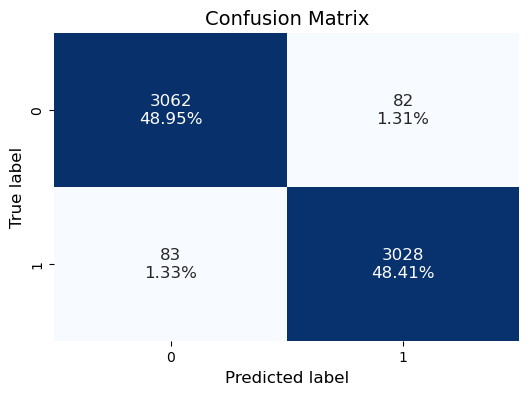

In [69]:
confusion_matrix_statsmodels(smote_model, X_train_smote, y_train_smote)

In [70]:
print("Training performance:")
smote_model_train_performance = model_performance_classification_statsmodels(smote_model, X_train_smote, y_train_smote)
smote_model_train_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.973621,0.97332,0.973633,0.973477


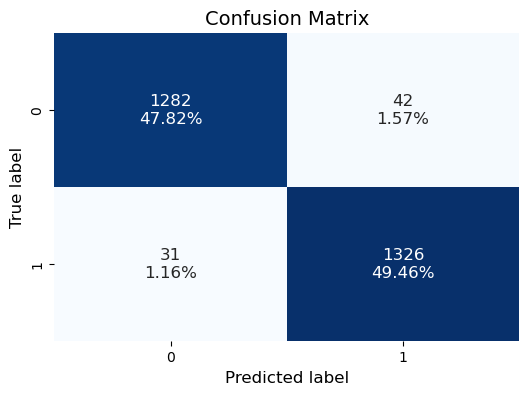

In [71]:
confusion_matrix_statsmodels(smote_model, X_test_smote, y_test_smote)

In [72]:
print("Testing performance:")
smote_model_test_performance = model_performance_classification_statsmodels(smote_model, X_test_smote, y_test_smote)
smote_model_test_performance

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.972771,0.977155,0.969298,0.973211


In [73]:
models_list.append({"name": "smote", 
                    "model": smote_model, 
                    "X_train": X_train_smote, 
                    "y_train": y_train_smote, 
                    "X_test": X_test_smote, 
                    "y_test": y_test_smote})

### <a name = 'ros'>ROS Model</a> <a href = #model>Model Building</a>

In [74]:
sampler_ros = RandomOverSampler(random_state=1)
X_ros, y_ros = sampler_ros.fit_resample(X_train, y_train)

In [75]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, y_ros, test_size=0.30, random_state=1
)

In [76]:
# build the model
ros_model = LogisticRegression(solver="liblinear")
ros_model.fit(X_train_ros, y_train_ros)

LogisticRegression(solver='liblinear')

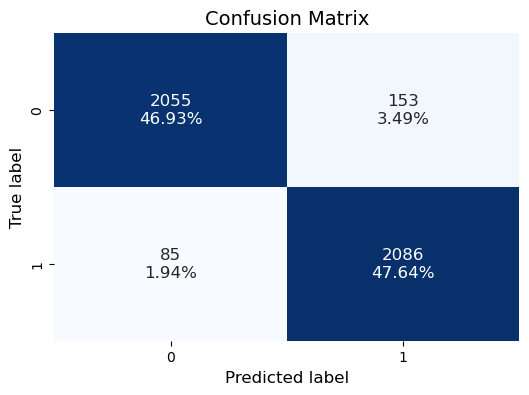

In [77]:
confusion_matrix_statsmodels(ros_model, X_train_ros, y_train_ros)

In [78]:
print("Training performance:")
ros_model_train_performance = model_performance_classification_statsmodels(ros_model, X_train_ros, y_train_ros)
ros_model_train_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.94565,0.960848,0.931666,0.946032


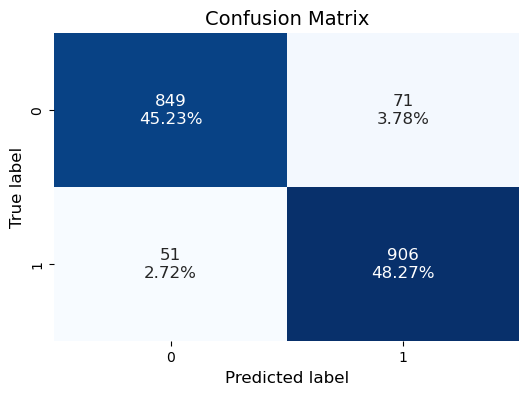

In [79]:
confusion_matrix_statsmodels(ros_model, X_test_ros, y_test_ros)

In [80]:
print("Testing performance:")
ros_model_test_performance = model_performance_classification_statsmodels(ros_model, X_test_ros, y_test_ros)
ros_model_test_performance

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.935003,0.946708,0.927329,0.936918


In [81]:
models_list.append({"name": "ros", 
                    "model": ros_model, 
                    "X_train": X_train_ros, 
                    "y_train": y_train_ros, 
                    "X_test": X_test_ros, 
                    "y_test": y_test_ros})

### <a name = 'no_xp'>SMOTE No Experience</a> <a href = #model>Model Building</a>

In [82]:
# SMOTE seems like the best model, will see if removing high VIF columsn will improve it

X_vif_no_Experience = X.drop("Experience", axis = 1).copy()
X_smote_no_exp, y_smote_no_exp = smote_sampler.fit_resample(X_vif_no_Experience, Y)

In [83]:
X_train_smote_no_exp, X_test_smote_no_exp, y_train_smote_no_exp, y_test_smote_no_exp = train_test_split(
    X_smote_no_exp, y_smote_no_exp, test_size=0.30, random_state=1
)

In [84]:
# build the model
smote_model_no_exp = LogisticRegression(solver="liblinear")
smote_model_no_exp.fit(X_train_smote_no_exp, y_train_smote_no_exp)

LogisticRegression(solver='liblinear')

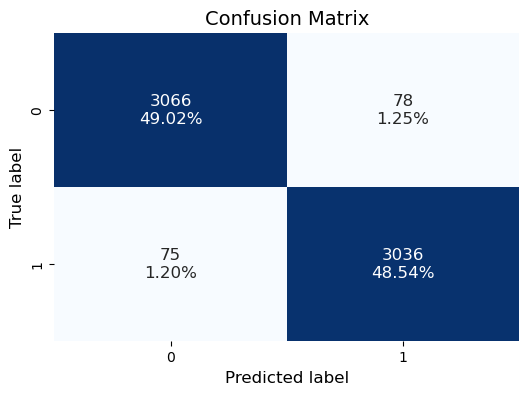

In [85]:
confusion_matrix_statsmodels(smote_model_no_exp, X_train_smote_no_exp, y_train_smote_no_exp)

In [86]:
print("Training performance:")
smote_model_train_no_exp_performance = model_performance_classification_statsmodels(smote_model_no_exp, 
                                                                                    X_train_smote_no_exp, 
                                                                                    y_train_smote_no_exp)

smote_model_train_no_exp_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.97554,0.975892,0.974952,0.975422


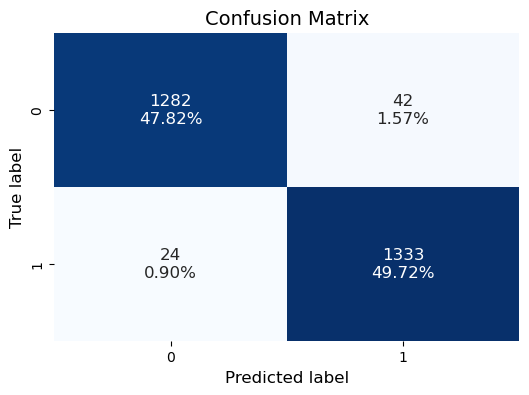

In [87]:
confusion_matrix_statsmodels(smote_model_no_exp, X_test_smote_no_exp, y_test_smote_no_exp)

In [88]:
print("Test performance:")
smote_model_test_no_exp_performance = model_performance_classification_statsmodels(smote_model_no_exp, 
                                                                                    X_test_smote_no_exp, 
                                                                                    y_test_smote_no_exp)

smote_model_test_no_exp_performance

Test performance:


,Accuracy,Recall,Precision,F1
0,0.975382,0.982314,0.969455,0.975842


In [89]:
models_list.append({"name": "smote_no_exp", 
                    "model": smote_model_no_exp, 
                    "X_train": X_train_smote_no_exp, 
                    "y_train": y_train_smote_no_exp, 
                    "X_test": X_test_smote_no_exp, 
                    "y_test": y_test_smote_no_exp})

### <a name = 'no_age'>SMOTE No Age</a> <a href = #model>Model Building</a>

In [90]:
# SMOTE seems like the best model, will see if removing high VIF columsn will improve it

X_vif_no_Age = X.drop("Age", axis = 1).copy()
X_smote_no_age, y_smote_no_age = smote_sampler.fit_resample(X_vif_no_Age, Y)

In [91]:
X_train_smote_no_age, X_test_smote_no_age, y_train_smote_no_age, y_test_smote_no_age = train_test_split(
    X_smote_no_age, y_smote_no_age, test_size=0.30, random_state=1
)

In [92]:
# build the model
smote_model_no_age = LogisticRegression(solver="liblinear")
smote_model_no_age.fit(X_train_smote_no_age, y_train_smote_no_age)

LogisticRegression(solver='liblinear')

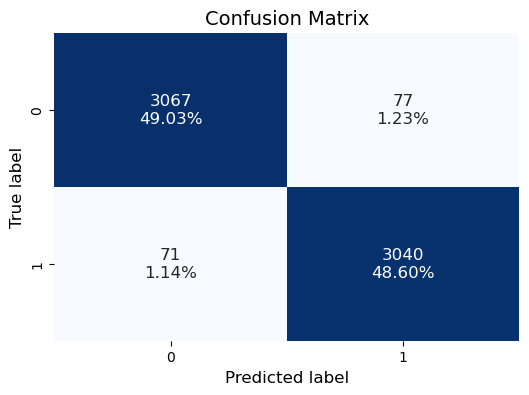

In [93]:
confusion_matrix_statsmodels(smote_model_no_age, X_train_smote_no_age, y_train_smote_no_age)

In [94]:
print("Training performance:")
smote_model_train_no_age_performance = model_performance_classification_statsmodels(smote_model_no_exp, 
                                                                                    X_train_smote_no_age, 
                                                                                    y_train_smote_no_age)

smote_model_train_no_age_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.971703,0.978785,0.964829,0.971757


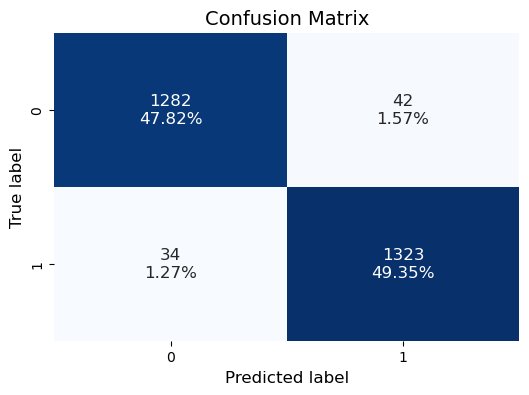

In [95]:
confusion_matrix_statsmodels(smote_model_no_age, X_test_smote_no_age, y_test_smote_no_age)

In [96]:
print("Test performance:")
smote_model_test_no_age_performance = model_performance_classification_statsmodels(smote_model_no_age, 
                                                                                    X_test_smote_no_age, 
                                                                                    y_test_smote_no_age)

smote_model_test_no_age_performance

Test performance:


,Accuracy,Recall,Precision,F1
0,0.971652,0.974945,0.969231,0.972079


In [97]:
models_list.append({"name": "smote_no_age", 
                    "model": smote_model_no_age, 
                    "X_train": X_train_smote_no_age, 
                    "y_train": y_train_smote_no_age, 
                    "X_test": X_test_smote_no_age, 
                    "y_test": y_test_smote_no_age})

### <a name ='zip'>SMOTE ZIPCodes</a> <a href = #model>Model Building</a>

In [98]:
# SMOTE seems like the best model, will see if removing high VIF columsn will improve it

X_vif_zipcodes = X.drop(["ZIPCode_90024","ZIPCode_90095","ZIPCode_90245","ZIPCode_91320","ZIPCode_91330",
                        "ZIPCode_91711","ZIPCode_92037","ZIPCode_92093","ZIPCode_93106","ZIPCode_93943",
                        "ZIPCode_94025","ZIPCode_94305","ZIPCode_94720","ZIPCode_95616"], axis = 1).copy()
X_smote_zipcodes, y_smote_zipcodes = smote_sampler.fit_resample(X_vif_zipcodes, Y)

In [99]:
X_train_smote_zipcodes, X_test_smote_zipcodes, y_train_smote_zipcodes, y_test_smote_zipcodes = train_test_split(
    X_smote_zipcodes, y_smote_zipcodes, test_size=0.30, random_state=1
)

In [100]:
smote_model_zipcodes = LogisticRegression(solver="liblinear")
smote_model_zipcodes.fit(X_train_smote_zipcodes, y_train_smote_zipcodes)

LogisticRegression(solver='liblinear')

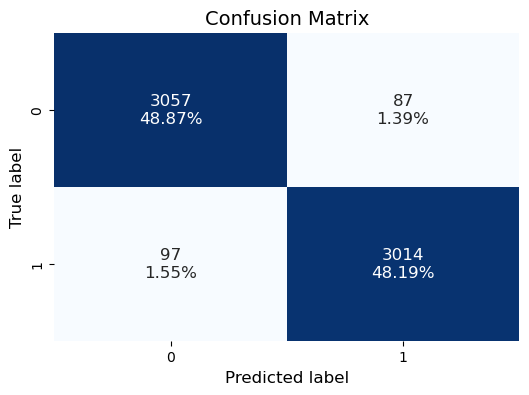

In [101]:
confusion_matrix_statsmodels(smote_model_zipcodes, X_train_smote_zipcodes, y_train_smote_zipcodes)

In [102]:
print("Training performance:")
smote_model_train_zipcodes_performance = model_performance_classification_statsmodels(smote_model_zipcodes, 
                                                                                    X_train_smote_zipcodes, 
                                                                                    y_train_smote_zipcodes)

smote_model_train_zipcodes_performance

Training performance:


,Accuracy,Recall,Precision,F1
0,0.970584,0.96882,0.971945,0.97038


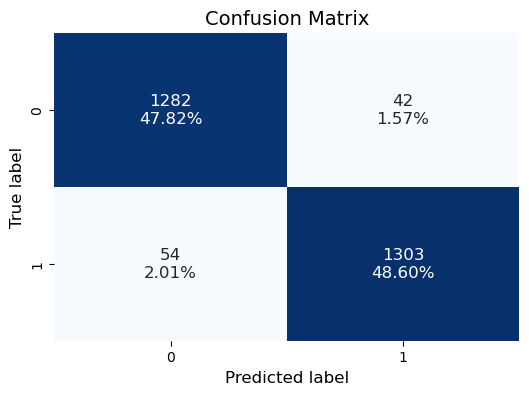

In [103]:
confusion_matrix_statsmodels(smote_model_zipcodes, X_test_smote_zipcodes, y_test_smote_zipcodes)

In [104]:
print("Test performance:")
smote_model_test_zipcodes_performance = model_performance_classification_statsmodels(smote_model_zipcodes, 
                                                                                    X_test_smote_zipcodes, 
                                                                                    y_test_smote_zipcodes)

smote_model_test_zipcodes_performance

Test performance:


,Accuracy,Recall,Precision,F1
0,0.964192,0.960206,0.968773,0.964471


In [105]:
models_list.append({"name": "smote_no_exp", 
                    "model": smote_model_zipcodes, 
                    "X_train": X_train_smote_zipcodes, 
                    "y_train": y_train_smote_zipcodes, 
                    "X_test": X_test_smote_zipcodes, 
                    "y_test": y_test_smote_zipcodes})

## <a name = 'comp'>Model Comparison and Final Model Selection</a> <a href = #toc>TOC</a>

### Numerical Scores

In [106]:
# training performance comparison

models_train_comparison_df = pd.concat(
    [
        base_model_train_performance.T,
        balanced_model_train_performance.T,
        no_zero_model_train_performance.T,
        scaled_model_train_performance.T,
        smote_model_train_performance.T,
        ros_model_train_performance.T,
        smote_model_train_no_exp_performance.T,
        smote_model_train_no_age_performance.T,
        smote_model_train_zipcodes_performance.T
    ],
    axis=1,
)

models_train_comparison_df.columns = [
    "base",
    "balanced",
    "zeros removed",
    "scaled",
    "smote",
    "ros",
    "no_xp",
    "no_age",
    "zipcodes",
]

In [107]:
# testing performance comparison

models_test_comparison_df = pd.concat(
    [
        base_model_test_performance.T,
        balanced_model_test_performance.T,
        no_zero_model_test_performance.T,
        scaled_model_test_performance.T,
        smote_model_test_performance.T,
        ros_model_test_performance.T,
        smote_model_test_no_exp_performance.T,
        smote_model_test_no_age_performance.T,
        smote_model_test_zipcodes_performance.T,
    ],
    axis=1,
)
models_test_comparison_df.columns = [
    "base",
    "balanced",
    "zeros removed",
    "scaled",
    "smote",
    "ros",
    "no_xp",
    "no_age",
    "zipcodes",
]

In [108]:
print("LogisticRegression Tree Model comparison:")
print()
print()
print("Training set:")
print(models_train_comparison_df)
print()
print()
print()
print("Test set:")
print(models_test_comparison_df)

LogisticRegression Tree Model comparison:


Training set:
               base  balanced  zeros removed    scaled     smote       ros  \
Accuracy   0.966792  0.926653       0.960150  0.977765  0.973621  0.945650   
Recall     0.719403  0.952239       0.665672  0.838806  0.973320  0.960848   
Precision  0.919847  0.572711       0.895582  0.924342  0.973633  0.931666   
F1         0.807370  0.715247       0.763699  0.879499  0.973477  0.946032   

              no_xp    no_age  zipcodes  
Accuracy   0.975540  0.971703  0.970584  
Recall     0.975892  0.978785  0.968820  
Precision  0.974952  0.964829  0.971945  
F1         0.975422  0.971757  0.970380  



Test set:
               base  balanced  zeros removed    scaled     smote       ros  \
Accuracy   0.951515  0.920539       0.955556  0.937374  0.972771  0.935003   
Recall     0.600000  0.868966       0.606897  0.620690  0.977155  0.946708   
Precision  0.861386  0.560000       0.907216  0.703125  0.969298  0.927329   
F1         0.707

### Curves

In [109]:
def plot_precision_recall_curves(models):
    plt.figure(figsize=(20, 30))
    i = 0
    while i < len(models):        
        # Train the model
        models[i]["model"].fit(models[i]["X_train"], models[i]["y_train"])

        # Predict probabilities on the test set
        y_probabilities = models[i]["model"].predict_proba(models[i]["X_test"])[:, 1]

        # Compute precision-recall curve
        precision, recall, thresholds = precision_recall_curve(models[i]["y_test"], y_probabilities)

        # Plot Precision-Recall curve
        plt.subplot(5, 4, i + 1)
        plt.plot(recall, precision)
        plt.tight_layout()
        plt.title(models[i]["name"])
        i += 1

    print('Precision-Recall Curves')    
    plt.show()

In [110]:
def plot_roc_curves(models):
    plt.figure(figsize=(20, 30))
    i = 0
    while i < len(models):
        # Train the model
        models[i]["model"].fit(models[i]["X_train"], models[i]["y_train"])

        # Predict probabilities on the test set
        y_probabilities = models[i]["model"].predict_proba(models[i]["X_test"])[:, 1]

        # Compute ROC AUC score
        roc_auc = roc_auc_score(models[i]["y_test"], y_probabilities)

        # Compute ROC curve
        fpr, tpr, thresholds_roc = roc_curve(models[i]["y_test"], y_probabilities)
        
        name = models[i]["name"]

        # Plot ROC curve
        plt.subplot(5, 4, i + 1)
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.tight_layout()
        plt.title(f"{name} - ROC AUC Score: {roc_auc:.4f}")
        i += 1

    print('ROC Curves:')
    plt.show()

Precision-Recall Curves


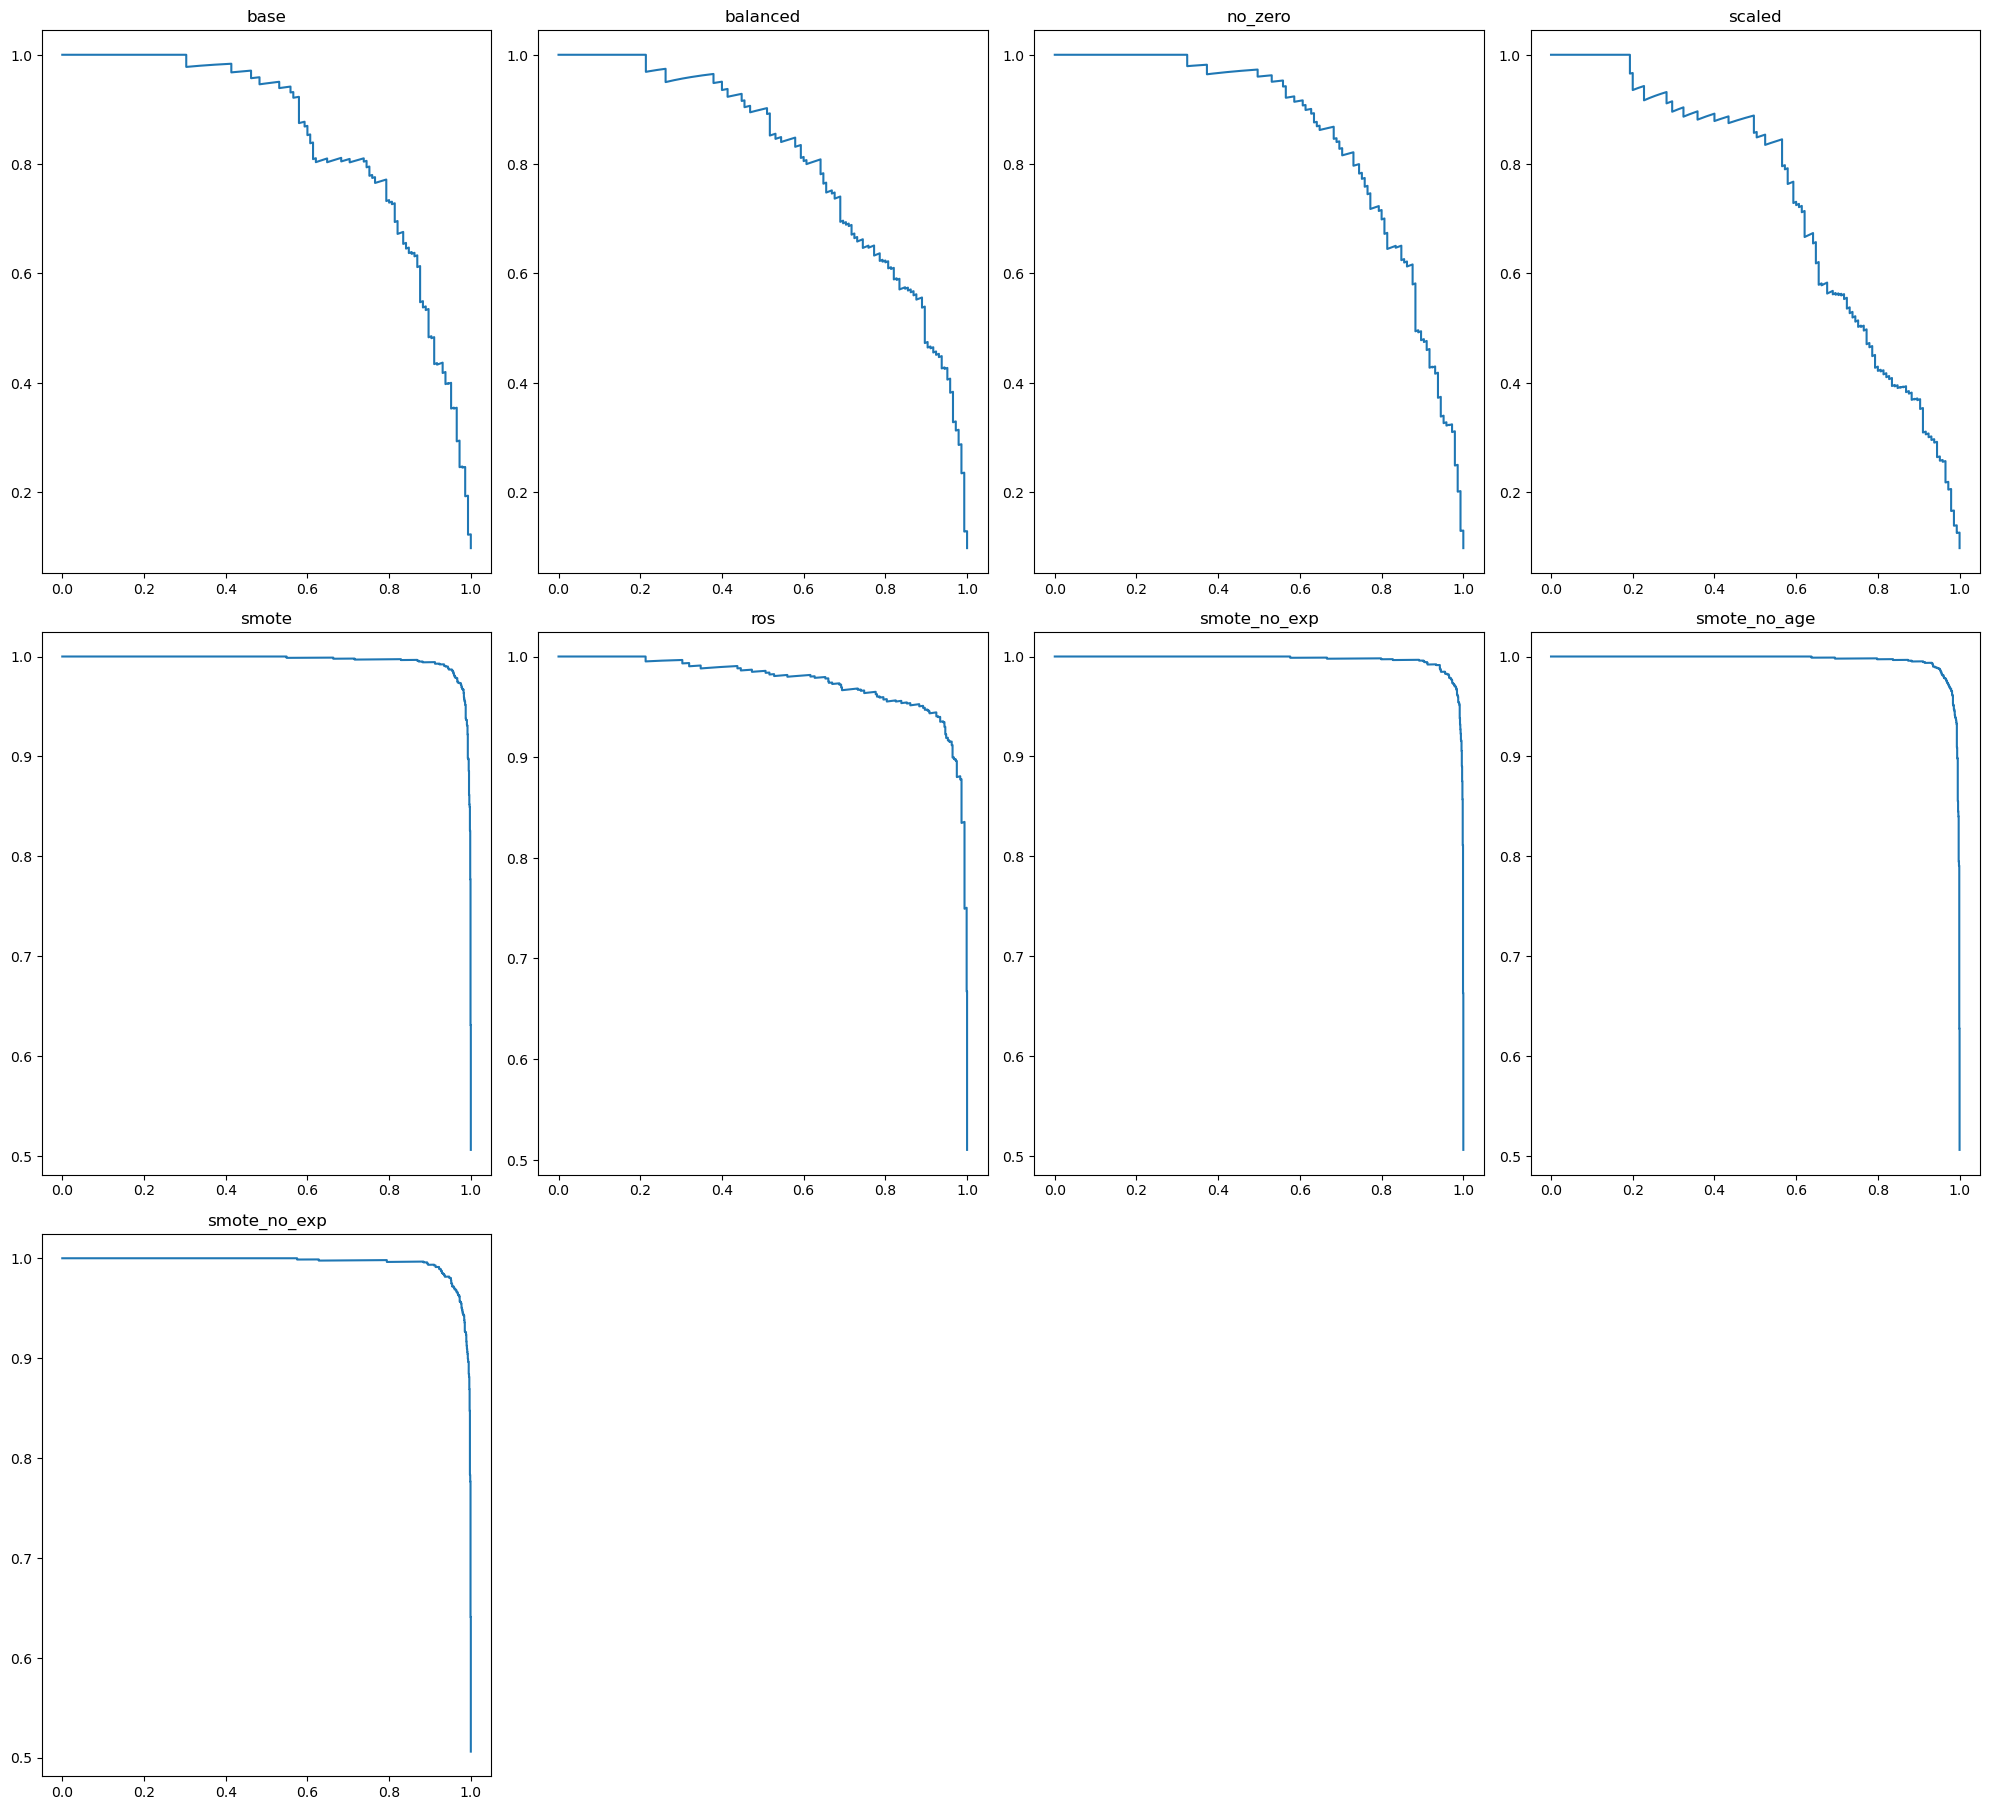

In [111]:
plot_precision_recall_curves(models_list)

ROC Curves:


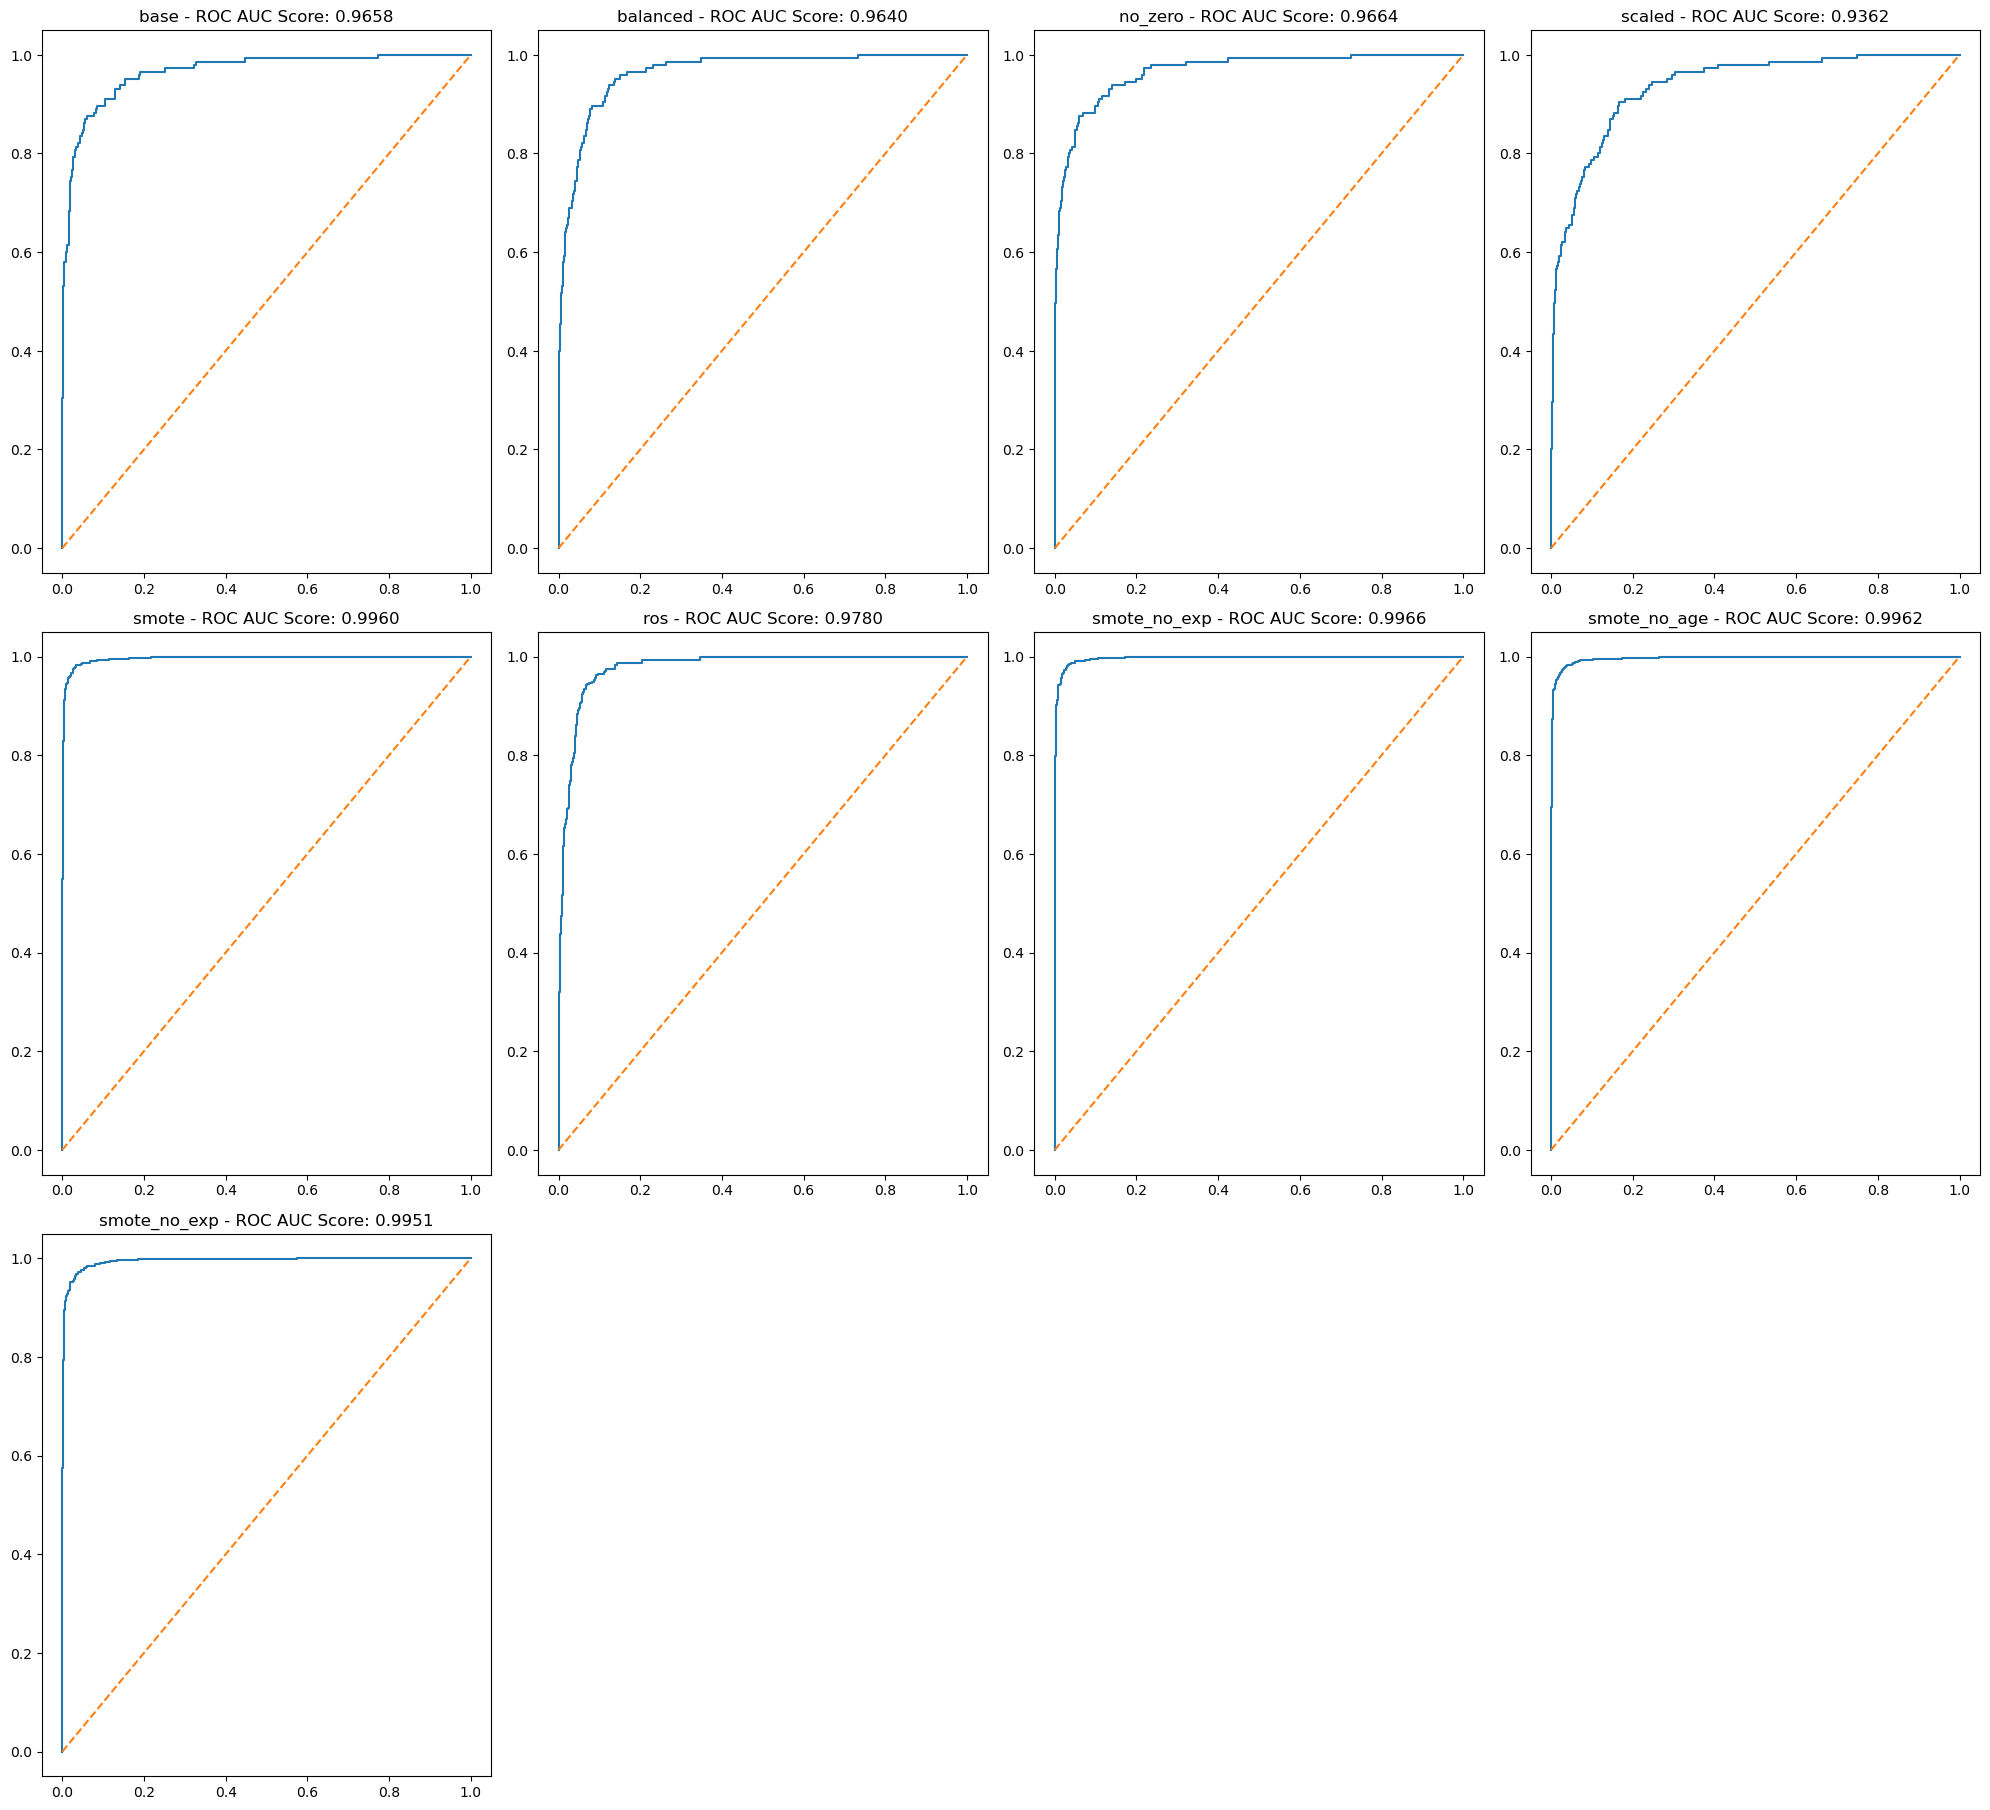

In [112]:
plot_roc_curves(models_list)

### Observation

* The model with the best precision in both train and test was the smote model. The no_xp model had a slightly higher precision score in train but there was a bigger shift from train to test which points to more overfitting.

## <a name='actionable'>Actionable Insights and Business Recommendations</a> <a href = #toc>TOC</a>


### Recomendations

* Use the SMOTE LogisticRegression Model to provide predictions to Marketing as to which demographic is most likely to purchase a Personal Loan as it is the most reliable one that could be provided given the data.

* Target customers with Income over 75

* Target customers with Mortgage over 55

* Target customers with Credit Card Average over 2

* Age was more important than experience in providing an accurate prediction.

* Areas for the most growth of Marketing include customers aged 31 and 39

* Areas for the most growth of Marketing include customers with experience of 10, 14, 15, 24, 33 and 40 years